In [1]:
from tensorflow.keras import datasets
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
(x, y), _ = datasets.mnist.load_data()

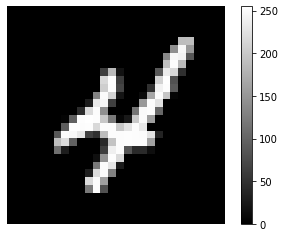

In [3]:
plt.imshow(x[9], cmap='gray')
plt.axis('off')
plt.colorbar()

## Flat the features

In [4]:
x = x.reshape(-1, 28 * 28) / x.max()
x.shape

(60000, 784)

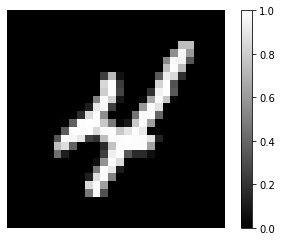

In [5]:
image = x[9].reshape(28,28)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.colorbar()

## One hot encodign

In [6]:
y_aux = np.zeros((len(x), 10))

for c in range(10):
  y_aux[:, c] = (y == c).astype(np.int16)
y = y_aux

## Divide into test and train sets

In [7]:
x = np.concatenate((np.ones((len(x), 1)), x), axis=1)
x.shape

(60000, 785)

In [8]:
train_with = int(0.7 * len(x))
x_train = x[:train_with]
x_test = x[train_with:]
y_train = y[:train_with]
y_test = y[train_with:]
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

## Single layer logistic regrersion 

input layer is 64 + 1 neurons and output layer has 10 neuorns. so our theta matris is going to be a $65x10$ matrix

In [9]:
sigmoid = lambda x: 1/(1 + np.exp(-x))

In [10]:
theta = np.zeros((28 * 28 + 1, 10))
theta.shape

(785, 10)

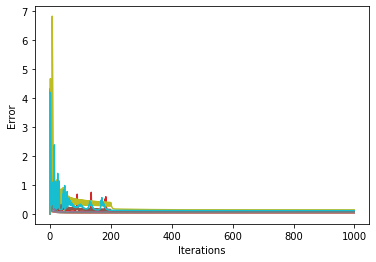

In [11]:
iterations = 1000
lr = 3
errors = np.zeros((iterations, 10))
for i in range(1, iterations):
    if i % 200 == 0: lr /= 10 # decrease learning Rate to avoid increase error
    a = sigmoid(x_train @ theta)

    error = 1/len(x_train) * (-y_train * np.log(a) - (1-y_train) * np.log(1-a)).sum(axis=0)
    errors[i, :] = error

    theta -= lr/len(x_train) * (x_train.T @ (a - y_train))

plt.plot(range(iterations), errors, '-')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

## Test set

In [12]:
a = sigmoid(x_test @ theta)
a = (a > 0.5).astype(np.float)

y_aux = y_test.argmax(axis=1).reshape(-1, 1)
a_aux = a.argmax(axis=1).reshape(-1, 1)

results = (y_aux == a_aux).astype(np.int)
print(f'multinomial logistic regrresion has {results.sum() / len(results) * 100:.2f} of acuracy')

multinomial logistic regrresion has 85.76 of acuracy


## Weights per pixel

In [13]:
w = theta[1:].T.reshape(-1, 28, 28)

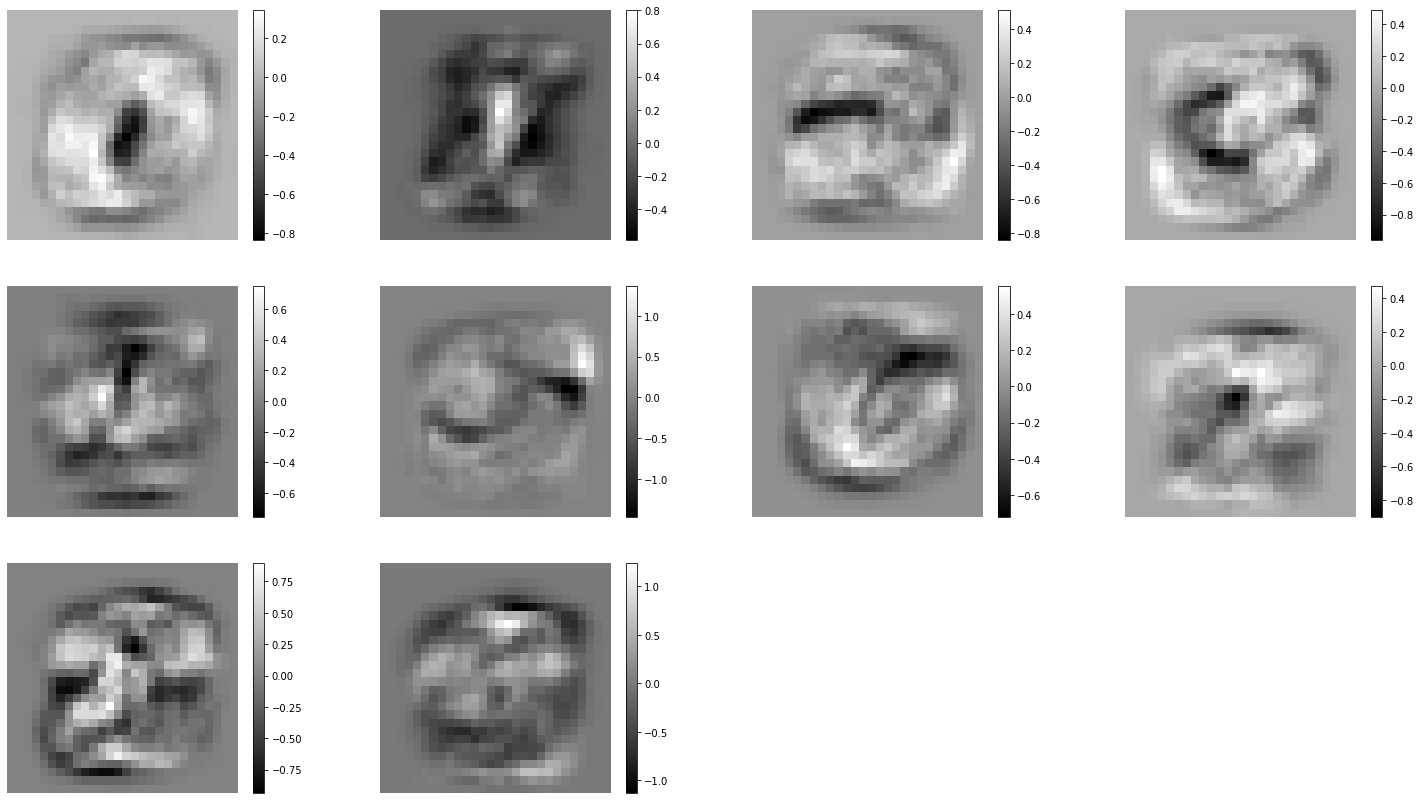

In [14]:
plt.figure(figsize=(4*6.4, 3*4.8))

for i in range(10):
    plt.subplot(3,4,i+1)
    plt.imshow(w[i], cmap='gray')
    plt.colorbar()
    plt.axis('off')
plt.show()

In [15]:
single_test = x_test[4].reshape(1, -1)

theta.shape

(785, 10)